In [3]:
import numpy as np
import torch
import librosa
from IPython.display import Audio, display
from matplotlib import pyplot as plt
import soundfile as sf

import sys
import os
# Add upper directory
current_dir = os.path.dirname(os.path.abspath('hw2.ipynb'))
upper_dir = (os.path.join(current_dir, '..'))
sys.path.append(upper_dir)
from utils_global import draw_spec

  “Speech has evolved as a primary form of communication between humans.
  
  The topic of this class, ‘discrete-time speech signal processing’  

  can be defined as the manipulation of sampled speech signals by a digital processor 
  
  to obtain a new signal with some desired properties.”

(1054654,) 48000


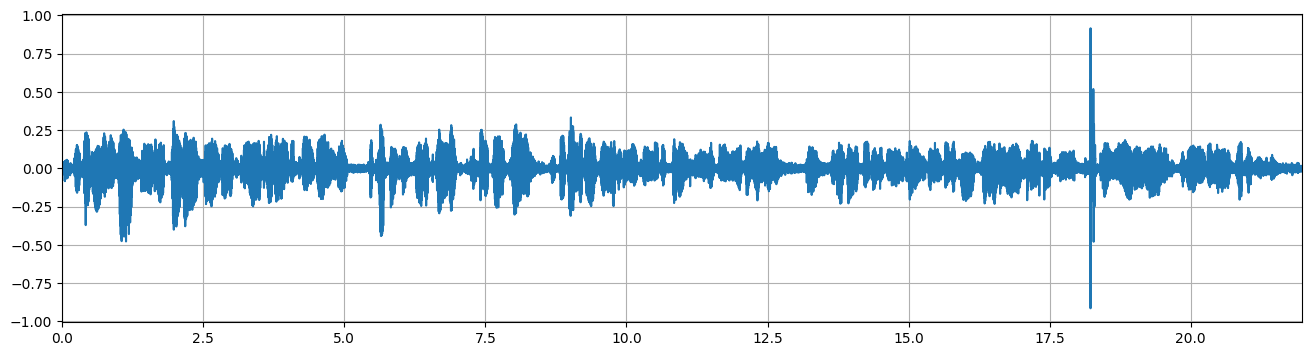

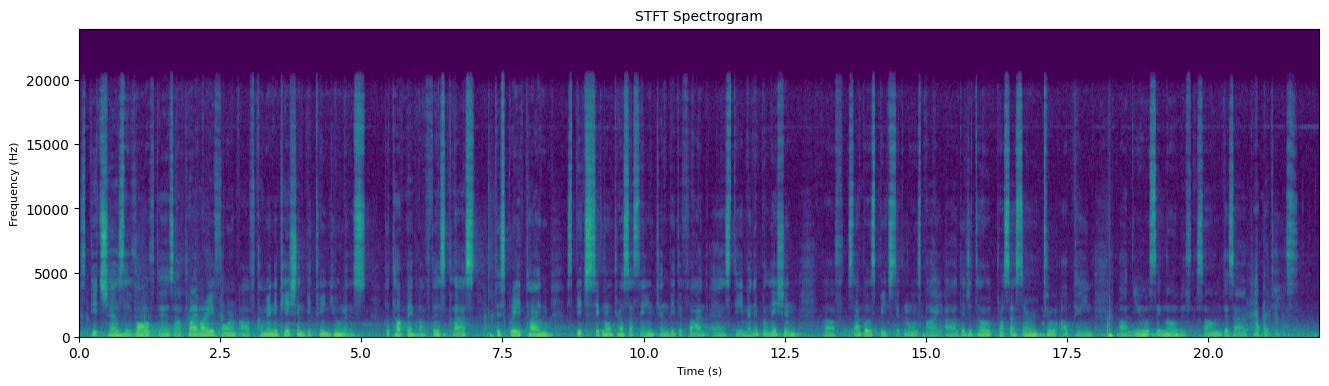

In [3]:
y,sr = librosa.load("../sample_crop.wav", sr=None)
print(y.shape, sr)

# sf.write("sample_crop.wav", y, samplerate=sr)
# y, sr = librosa.load('/home/woongjib/Projects/24-2_SSP/HW2/sample_crop_16000.wav', sr=16000)
# y = y[:8_0000] # crop 

sf.write("crop_16khz.wav", y, samplerate=sr)

time = np.arange(1, len(y)+1) / sr
plt.figure(figsize=(16,4))
plt.plot(time, y)
plt.xlim(0, time[-1])
plt.grid()
plt.show()

t = draw_spec(y, sr=sr, win_len=320, hop_len=160, figsize=(16,4), 
          title='STFT Spectrogram', use_colorbar=False, cmap='viridis')
# display(Audio(y, rate=sr))

(65916,) 3000


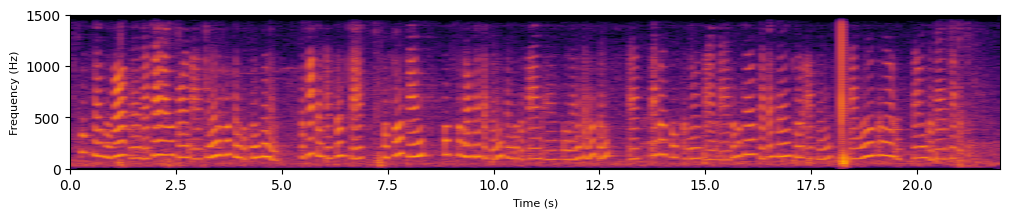

(175776,) 8000


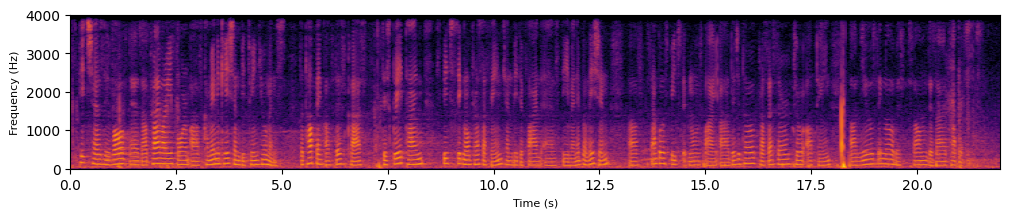

(351552,) 16000


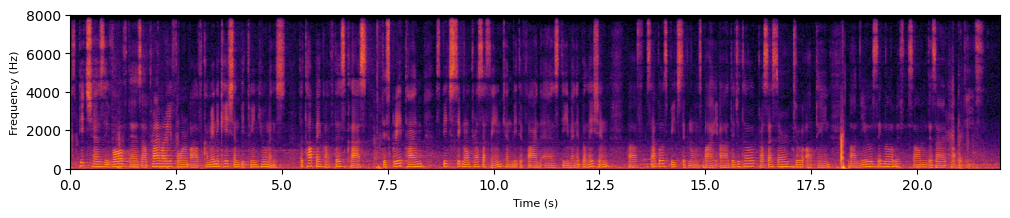

In [22]:
# """ Resample into 4, 8, 16 kHZ """
# for sr in [3000, 8000, 16000]:
#     y,sr = librosa.load("sample_crop.wav", sr=sr)
#     print(y.shape, sr)

#     # sf.write("sample_crop.wav", y, samplerate=sr)

#     # plt.figure(figsize=(12,4))
#     # plt.plot(y)
#     # plt.xlim(0, len(y))
#     # plt.grid()

#     sf.write(f"sample_crop_{sr}.wav", y, samplerate=sr)
#     display(Audio(y, rate=sr))
#     t = draw_spec(y, sr=sr, figsize=(12,2), use_colorbar=False)
#     plt.show()

In [1]:
""" STFT Extraction """
from scipy.fftpack import fft
from utils import stft

def ste(y, sr=16000, win_len_in_ms=20, hop_len_in_ms=10, pad_mode='constant'):
    """
    Short-Time Energy (STE) calculation.

    Returns:
    ste_values: 2D NumPy array representing the short-time energy for each frame.
    """
    # Convert window and hop lengths from milliseconds to samples
    win_len = int(win_len_in_ms * sr / 1000)
    hop_len = int(hop_len_in_ms * sr / 1000)
    # Add padding to the signal (before and after)
    y = np.pad(y, (win_len, win_len), mode=pad_mode, constant_values=0)
    
    ste_values = []

    for start in range(0, len(y) - win_len, hop_len):
        end = start + win_len
        frame = y[start:end]
        # Calculate short-time energy
        energy = np.sum(frame ** 2)
        ste_values.append(energy)
    
    ste_values = ste_values[1:]
    return np.array(ste_values)


def zcr(y, sr=16000, win_len_in_ms=20, hop_len_in_ms=10, pad_mode='constant'):
    """
    Zero Crossing Rate (ZCR) calculation.

    Returns:
    zcr_values: 2D NumPy array representing the zero crossing rate for each frame.
    """
    # Convert window and hop lengths from milliseconds to samples
    win_len = int(win_len_in_ms * sr / 1000)
    hop_len = int(hop_len_in_ms * sr / 1000)
    # Add padding to the signal (before and after)
    y = np.pad(y, (win_len, win_len), mode=pad_mode, constant_values=0)
    
    zcr_values = []

    for start in range(0, len(y) - win_len, hop_len):
        end = start + win_len
        frame = y[start:end]
        # Calculate zero crossing rate
        zero_crossings = np.sum(np.abs(np.diff(np.sign(frame)))) / 2
        zcr_values.append(zero_crossings)
    
    zcr_values = zcr_values[1:]
    return np.array(zcr_values)


y, sr = librosa.load('/home/woongjib/Projects/24-2_SSP/HW2/sample_crop_16000.wav', sr=16000)
y = y[:8_0000] # crop 
spec = stft(y, sr=sr, win_type='hann', win_len_in_ms=20, hop_len_in_ms=10, 
            figsize=(16,4), n_fft=2048, plot=True, use_colorbar=False
            )
ste = ste(y, sr=sr)
zcr = zcr(y, sr=sr)

print(ste.shape)
print(zcr.shape)
print(spec.shape)



ImportError: cannot import name 'stft' from 'utils' (/home/woongjib/Projects/24-2_SSP/HW2/utils.py)

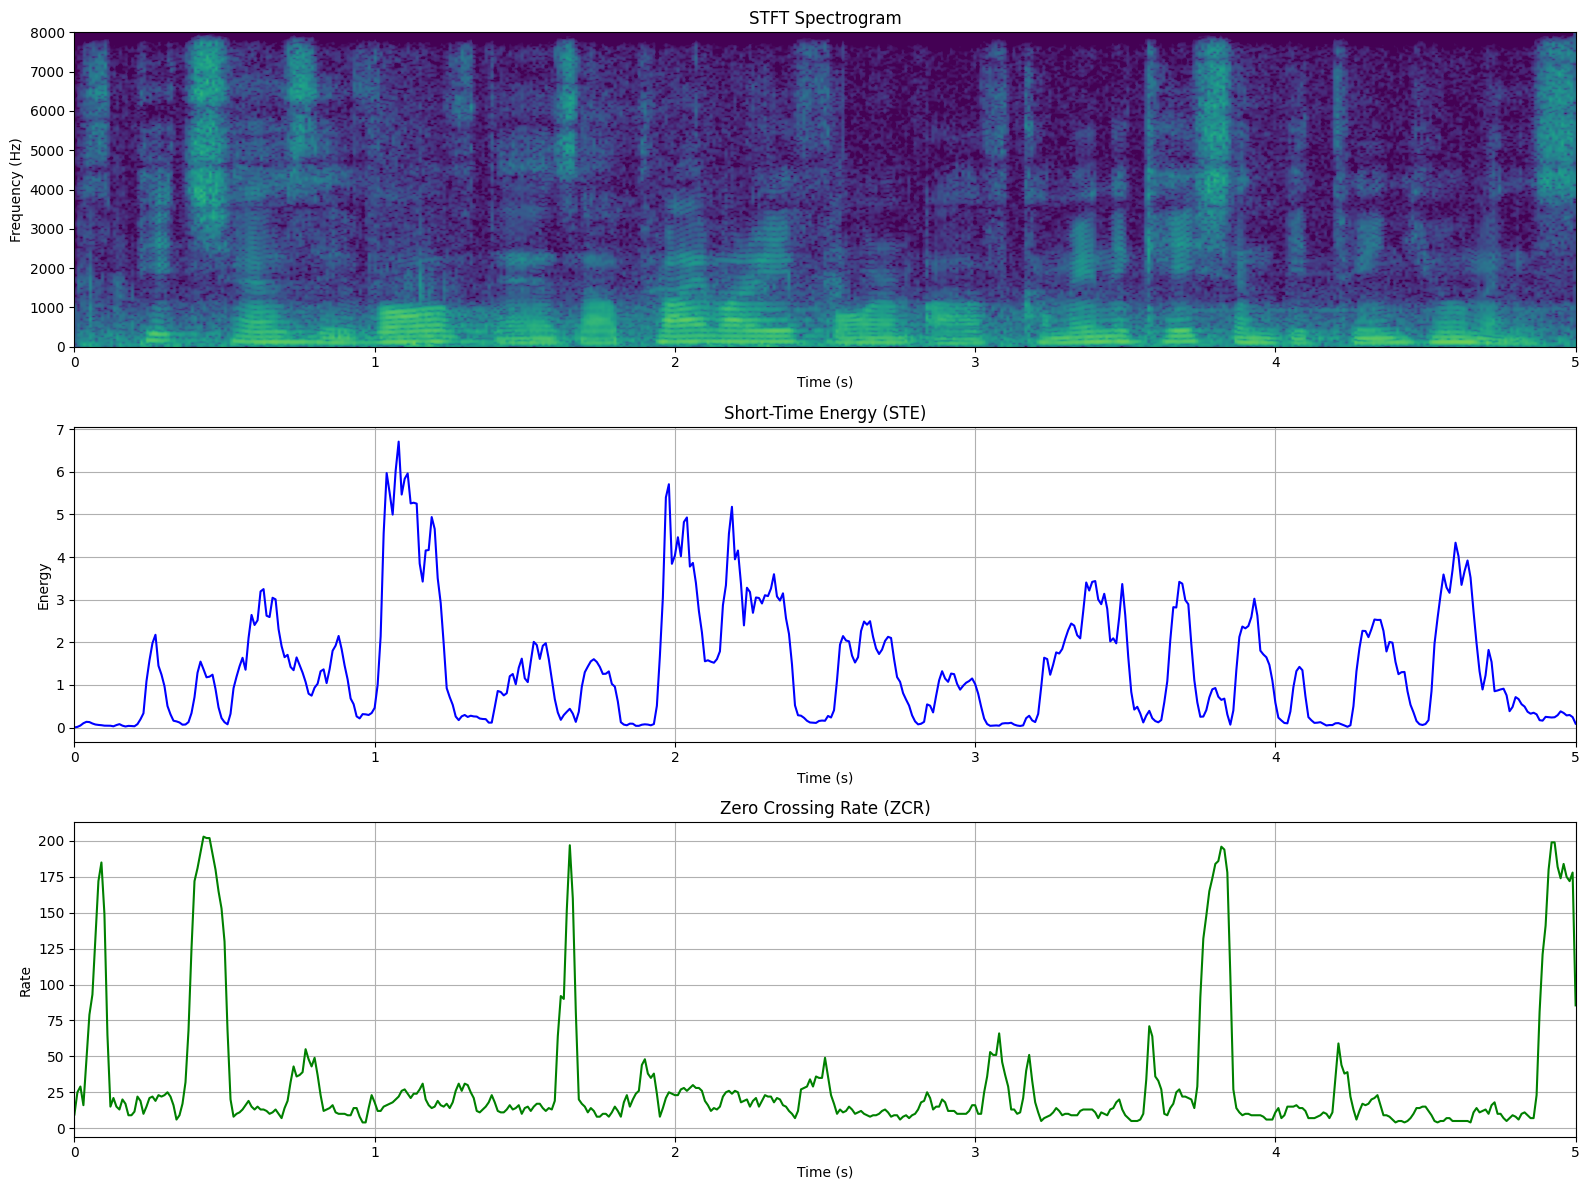

In [70]:
import matplotlib.pyplot as plt

# Plot the STFT, STE, and ZCR on a single figure with 3 x 1 subplots
def plot_stft_ste_zcr(spec, ste, zcr, sr=16000, hop_len_in_ms=10):
    """
    Plot STFT, Short-Time Energy (STE), and Zero Crossing Rate (ZCR) in a 3x1 subplot figure.
    """
    # Convert hop length from ms to samples
    hop_len = int(hop_len_in_ms * sr / 1000)
    time_axis = np.arange(spec.shape[1]) * hop_len / sr  # Time axis for STFT
    time_axis_ste_zcr = np.arange(len(ste)) * hop_len / sr  # Time axis for STE and ZCR

    fig, axs = plt.subplots(3, 1, figsize=(16, 12))

    # STFT plot
    axs[0].imshow(spec, aspect='auto', origin='lower', cmap='viridis', 
                  vmin=-50, vmax=40,
                  extent=[0, len(y) / sr, 0, sr // 2])
    axs[0].set_title("STFT Spectrogram", fontsize=12)
    axs[0].set_ylabel("Frequency (Hz)", fontsize=10)
    axs[0].set_xlabel("Time (s)", fontsize=10)

 # STE plot
    axs[1].plot(time_axis_ste_zcr, ste, label='STE', color='b')
    axs[1].set_title("Short-Time Energy (STE)", fontsize=12)
    axs[1].set_ylabel("Energy", fontsize=10)
    axs[1].set_xlabel("Time (s)", fontsize=10)
    axs[1].set_xlim([time_axis_ste_zcr[0], time_axis_ste_zcr[-1]])  # X-axis limits set to start and end of time
    axs[1].grid(True)  # Add grid

    # ZCR plot
    axs[2].plot(time_axis_ste_zcr, zcr, label='ZCR', color='g')
    axs[2].set_title("Zero Crossing Rate (ZCR)", fontsize=12)
    axs[2].set_ylabel("Rate", fontsize=10)
    axs[2].set_xlabel("Time (s)", fontsize=10)
    axs[2].set_xlim([time_axis_ste_zcr[0], time_axis_ste_zcr[-1]])  # X-axis limits set to start and end of time
    axs[2].grid(True)  # Add grid

    plt.tight_layout()
    plt.show()

# Plot the STFT, STE, and ZCR together
plot_stft_ste_zcr(spec, ste, zcr, sr=sr, hop_len_in_ms=10)




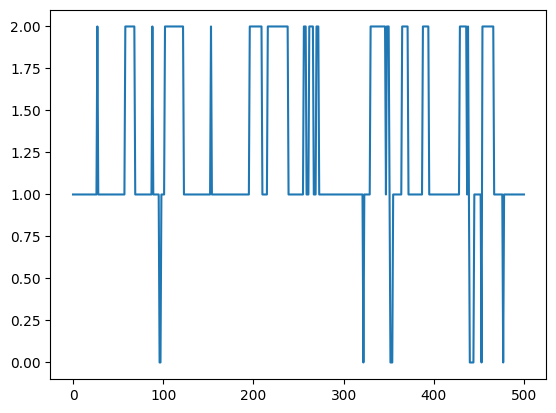

In [78]:
# Example threshold values, you can adjust them based on the signal characteristics
ste_threshold_voiced = 2
ste_threshold_unvoiced = 0

zcr_threshold_voiced = 100
zcr_threshold_unvoiced = 5

# Assuming zcr_values and ste_values are already computed for each frame
classification = []
for i in range(len(zcr)):
    if ste[i] > ste_threshold_voiced and zcr[i] < zcr_threshold_voiced:
        classification.append(2)  # Voiced
    elif ste[i] > ste_threshold_unvoiced and zcr[i] > zcr_threshold_unvoiced:
        classification.append(1)  # Unvoiced
    else:
        classification.append(0)  # Background
    
plt.plot(classification)

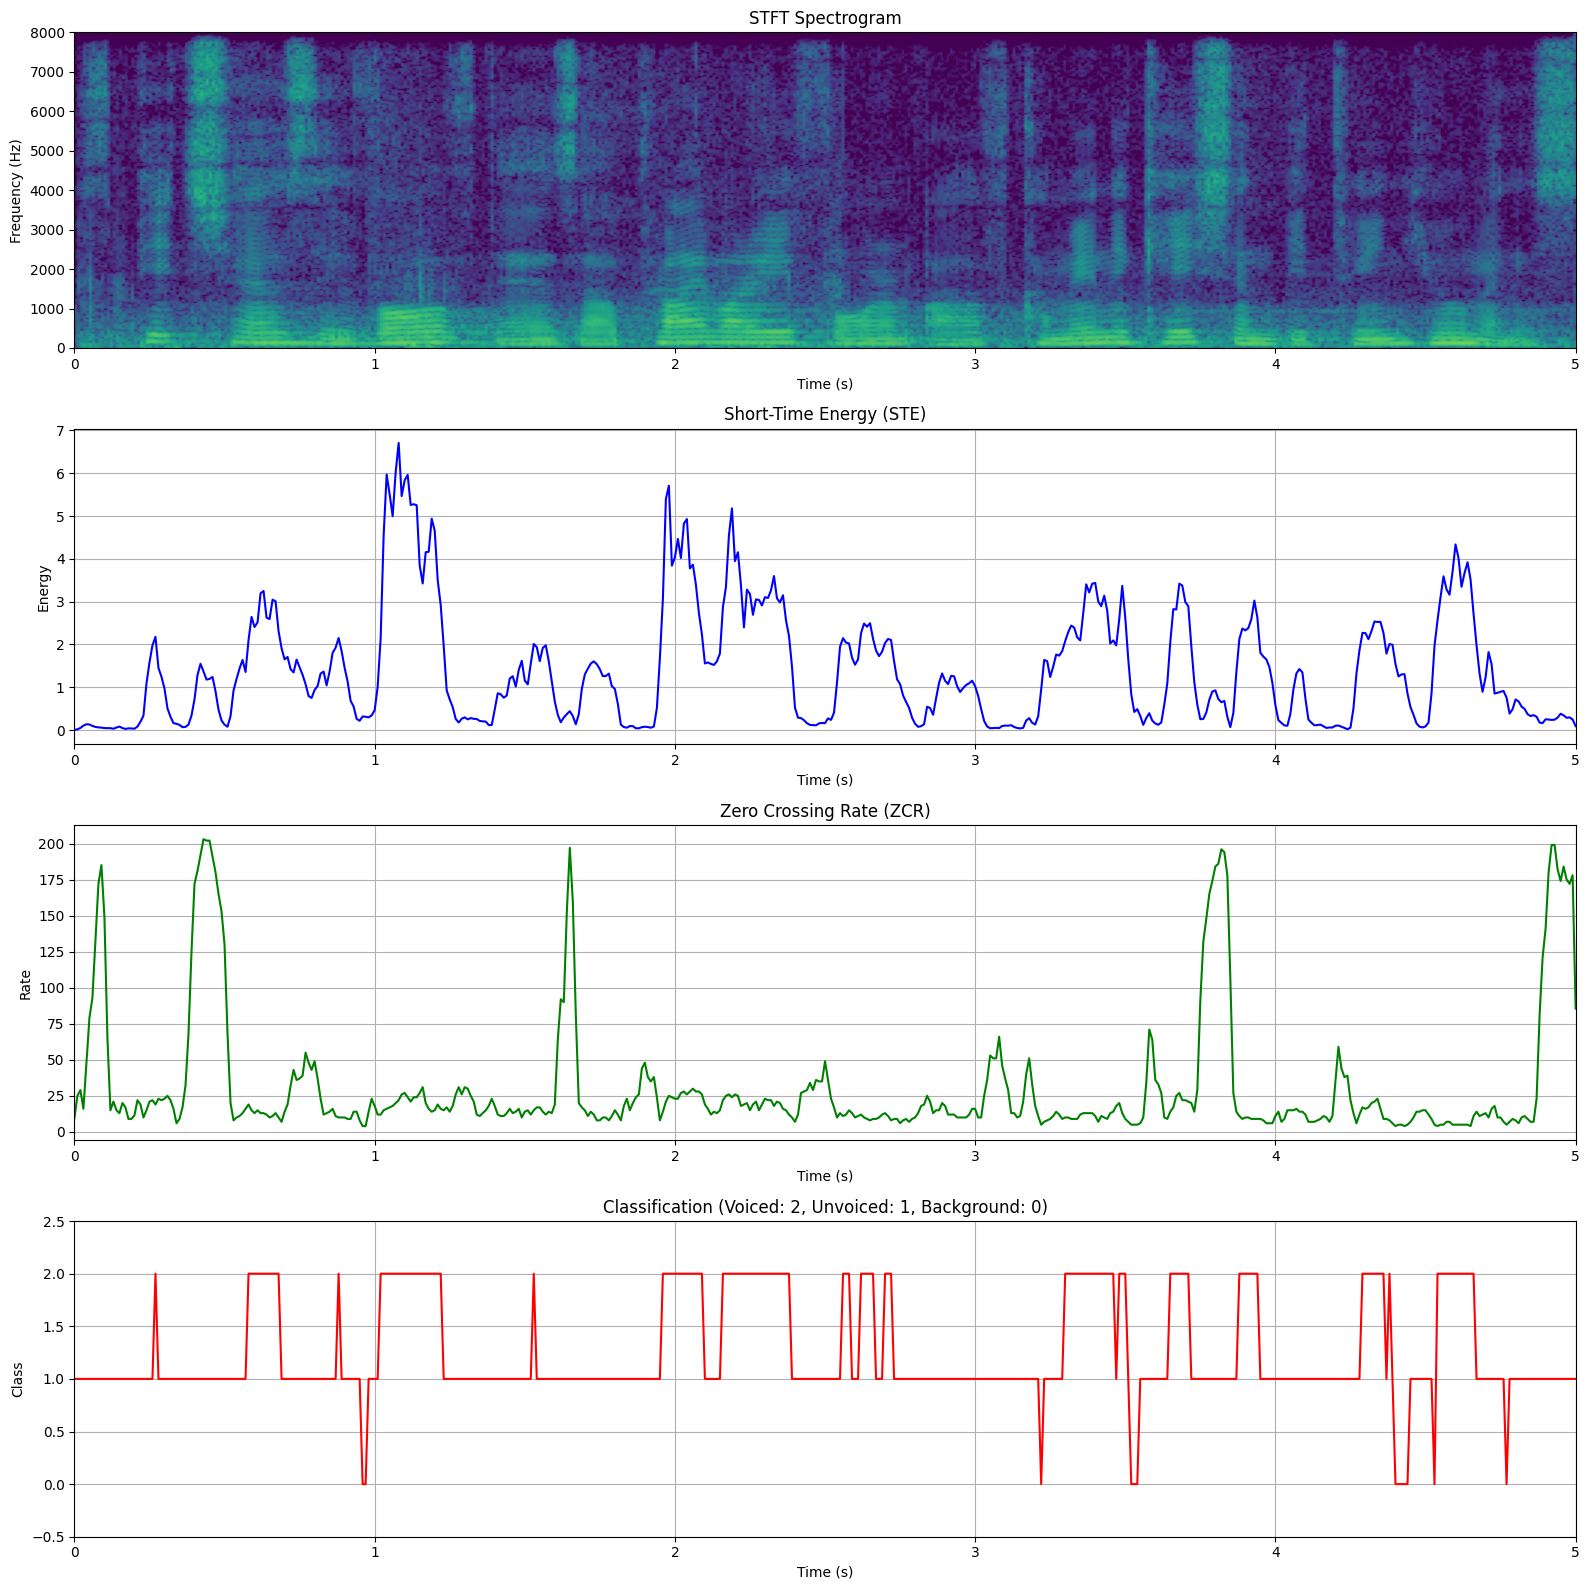

In [80]:
def plot_stft_ste_zcr_classification(spec, ste, zcr, classification, sr=16000, hop_len_in_ms=10):
    """
    Plot STFT, Short-Time Energy (STE), Zero Crossing Rate (ZCR), and classification in a 4x1 subplot figure.
    """
    # Convert hop length from ms to samples
    hop_len = int(hop_len_in_ms * sr / 1000)
    time_axis = np.arange(spec.shape[1]) * hop_len / sr  # Time axis for STFT
    time_axis_ste_zcr = np.arange(len(ste)) * hop_len / sr  # Time axis for STE and ZCR

    fig, axs = plt.subplots(4, 1, figsize=(16, 16))

    # STFT plot
    axs[0].imshow(spec, aspect='auto', origin='lower', cmap='viridis', 
                  vmin=-50, vmax=40,
                  extent=[0, len(y) / sr, 0, sr // 2])
    axs[0].set_title("STFT Spectrogram", fontsize=12)
    axs[0].set_ylabel("Frequency (Hz)", fontsize=10)
    axs[0].set_xlabel("Time (s)", fontsize=10)

    # STE plot
    axs[1].plot(time_axis_ste_zcr, ste, label='STE', color='b')
    axs[1].set_title("Short-Time Energy (STE)", fontsize=12)
    axs[1].set_ylabel("Energy", fontsize=10)
    axs[1].set_xlabel("Time (s)", fontsize=10)
    axs[1].set_xlim([time_axis_ste_zcr[0], time_axis_ste_zcr[-1]])
    axs[1].grid(True)

    # ZCR plot
    axs[2].plot(time_axis_ste_zcr, zcr, label='ZCR', color='g')
    axs[2].set_title("Zero Crossing Rate (ZCR)", fontsize=12)
    axs[2].set_ylabel("Rate", fontsize=10)
    axs[2].set_xlabel("Time (s)", fontsize=10)
    axs[2].set_xlim([time_axis_ste_zcr[0], time_axis_ste_zcr[-1]])
    axs[2].grid(True)

    # Classification plot
    axs[3].plot(time_axis_ste_zcr, classification, label='Classification', color='r')
    axs[3].set_title("Classification (Voiced: 2, Unvoiced: 1, Background: 0)", fontsize=12)
    axs[3].set_ylabel("Class", fontsize=10)
    axs[3].set_xlabel("Time (s)", fontsize=10)
    axs[3].set_xlim([time_axis_ste_zcr[0], time_axis_ste_zcr[-1]])
    axs[3].set_ylim([-0.5, 2.5])  # To clearly show the class values (0, 1, 2)
    axs[3].grid(True)

    plt.tight_layout()
    plt.show()

# Plot the STFT, STE, ZCR, and classification together
plot_stft_ste_zcr_classification(spec, ste, zcr, classification, sr=sr, hop_len_in_ms=10)
